In [15]:
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

In [16]:
import yfinance as yf
# Get the data for tatamotors
ticker = "TATAMOTORS.NS"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [17]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [25]:
# create the differenced variable (log returns)
data['Returns'] = np.log(data['Adj Close']).diff().dropna()

In [32]:
#Drop NaN values resulted from differencing 
data.dropna(inplace=True)

In [33]:
data

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2021-04-05,306.799988,311.700012,297.200012,305.049988,303.166656,66178755,-0.008812
2021-04-06,306.149994,313.799988,304.799988,307.750000,305.850006,63031783,0.008812
2021-04-07,306.750000,310.649994,305.100006,307.799988,305.899689,39073986,0.000162
2021-04-08,307.899994,319.799988,307.500000,313.950012,312.011719,62459774,0.019784
2021-04-09,313.200012,325.000000,312.500000,318.200012,316.235474,75462572,0.013446
...,...,...,...,...,...,...,...
2024-03-21,951.000000,969.250000,946.000000,964.900024,961.931580,11074207,0.025666
2024-03-22,964.900024,986.200012,950.349976,979.799988,976.785706,13638296,0.015324
2024-03-26,977.000000,995.000000,976.000000,986.200012,983.166016,9461531,0.006511


In [26]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2021-04-01,306.750000,309.850006,303.049988,307.750000,305.850006,44088352,NaN
2021-04-05,306.799988,311.700012,297.200012,305.049988,303.166656,66178755,-0.008812
2021-04-06,306.149994,313.799988,304.799988,307.750000,305.850006,63031783,0.008812
2021-04-07,306.750000,310.649994,305.100006,307.799988,305.899689,39073986,0.000162
2021-04-08,307.899994,319.799988,307.500000,313.950012,312.011719,62459774,0.019784


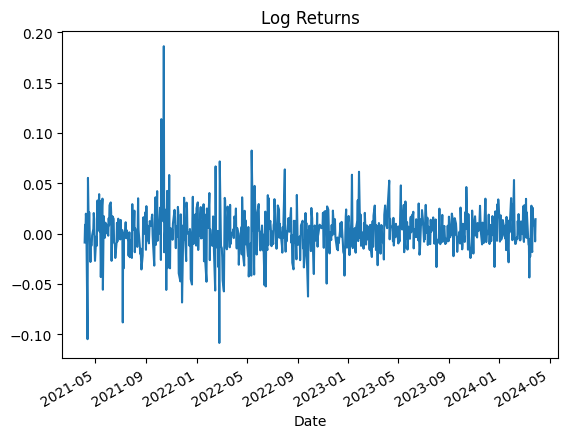

In [27]:
#plot the returns 
data['Returns'].plot(title='Log Returns')
plt.show()

In [36]:
#pip install arch

In [29]:
from arch import arch_model

In [34]:
# Fit an ARCH model
arch_model_fit = arch_model(data['Returns'], vol='ARCH', p=1).fit(disp='off')
print(arch_model_fit.summary())





                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                1783.18
Distribution:                  Normal   AIC:                          -3560.36
Method:            Maximum Likelihood   BIC:                          -3546.54
                                        No. Observations:                  739
Date:                Thu, Jul 25 2024   Df Residuals:                      738
Time:                        10:25:57   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.5984e-03  7.789e-04      2.052  4.017e-02 [7.

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004757. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


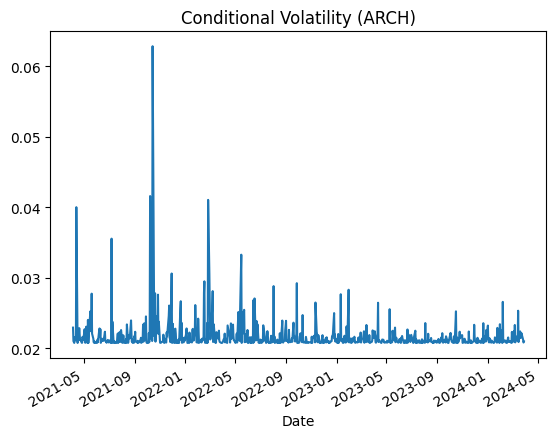

In [35]:
# Plot the conditional volatility
arch_model_fit.conditional_volatility.plot(title='Conditional Volatility (ARCH)')
plt.show()


In [40]:
# Fit a GARCH model
garch_model_fit = arch_model(data['Returns'], vol='Garch', p=1, q=1).fit(disp='off')
print(garch_model_fit.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1824.70
Distribution:                  Normal   AIC:                          -3641.41
Method:            Maximum Likelihood   BIC:                          -3622.99
                                        No. Observations:                  739
Date:                Thu, Jul 25 2024   Df Residuals:                      738
Time:                        10:46:34   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.5551e-03  7.057e-04      2.204  2.754e-02 [1.

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004757. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


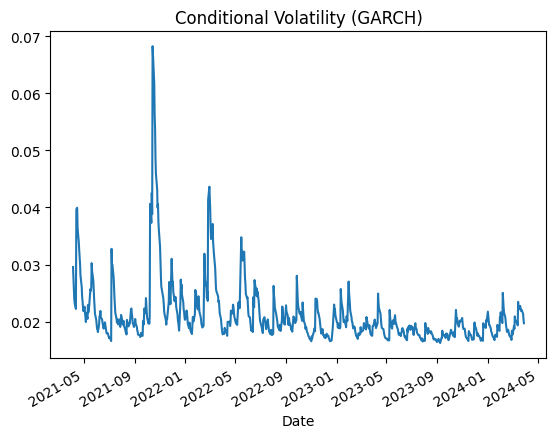

In [41]:
# Plot the conditional volatility
garch_model_fit.conditional_volatility.plot(title='Conditional Volatility (GARCH)')
plt.show()

In [52]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1579.001920121877
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1579.000631377724
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9


In [53]:
forecasts = res.forecast()

In [54]:
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [55]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2024-03-21,951.000000,969.250000,946.000000,964.900024,961.931580,11074207,0.025666
2024-03-22,964.900024,986.200012,950.349976,979.799988,976.785706,13638296,0.015324
2024-03-26,977.000000,995.000000,976.000000,986.200012,983.166016,9461531,0.006511
2024-03-27,991.599976,995.000000,976.700012,978.650024,975.639282,6640537,-0.007685
2024-03-28,982.500000,999.900024,979.000000,992.799988,989.745728,9862996,0.014355


In [56]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2024-03-28  0.175205
                 h.1
Date                
2024-03-28  3.381013
                 h.1
Date                
2024-03-28  3.381013


In [57]:
forecasts = res.forecast(horizon=90)
print(forecasts.residual_variance.iloc[-3:])

                h.01      h.02      h.03     h.04      h.05      h.06  \
Date                                                                    
2024-03-28  3.381013  3.613509  3.806741  3.96734  4.100818  4.211754   

                h.07      h.08      h.09     h.10  ...      h.81      h.82  \
Date                                               ...                       
2024-03-28  4.303956  4.380587  4.444276  4.49721  ...  4.757719  4.757719   

                h.83      h.84      h.85      h.86      h.87      h.88  \
Date                                                                     
2024-03-28  4.757719  4.757719  4.757719  4.757719  4.757719  4.757719   

                h.89      h.90  
Date                            
2024-03-28  4.757719  4.757719  

[1 rows x 90 columns]


In [58]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.81,h.82,h.83,h.84,h.85,h.86,h.87,h.88,h.89,h.90
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-28,3.381013,3.613509,3.806741,3.96734,4.100818,4.211754,4.303956,4.380587,4.444276,4.49721,...,4.757719,4.757719,4.757719,4.757719,4.757719,4.757719,4.757719,4.757719,4.757719,4.757719


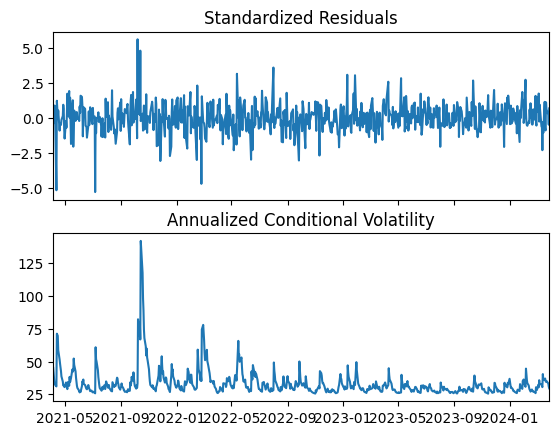

In [59]:
fig = res.plot(annualize="D")